In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering, AffinityPropagation, MeanShift
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv('C:/Users/syedm/Desktop/Semester 2/MBAN 6120/Customer_Data.csv')

In [8]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
df.columns = df.columns.str.lower()
df.set_index('cust_id', inplace=True)
df.shape

(8950, 17)

In [10]:
df.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Basic Data Cleaning

In [11]:
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [12]:
# We only have 313 missing values for minimum_payments and 1 for credit_limit. This is about 3.4% of
# the data, so lets fill it with median
df['minimum_payments'].fillna(df['minimum_payments'].median(), inplace=True)
df['credit_limit'].fillna(df['credit_limit'].median(), inplace=True)

C:\Users\syedm\AppData\Local\Temp\ipykernel_30092\1945847744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['minimum_payments'].fillna(df['minimum_payments'].median(), inplace=True)
C:\Users\syedm\AppData\Local\Temp\ipykernel_30092\1945847744.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

# Data Quality
We begin by checking the multicollinearity of the initial features. The chart shows that there is a significant issue with multicollinearity in this data. We will check the actual features that are highly correlated, taking an initial threshold of 70%. We see that **Purchases** and **One Off Purchases** have a correlation of over 90%. We need to address this, but first, let us handle outliers in our data, which can impact many clustering techniques that depend on centroid formation. We will cap the outliers using the interquartile range.

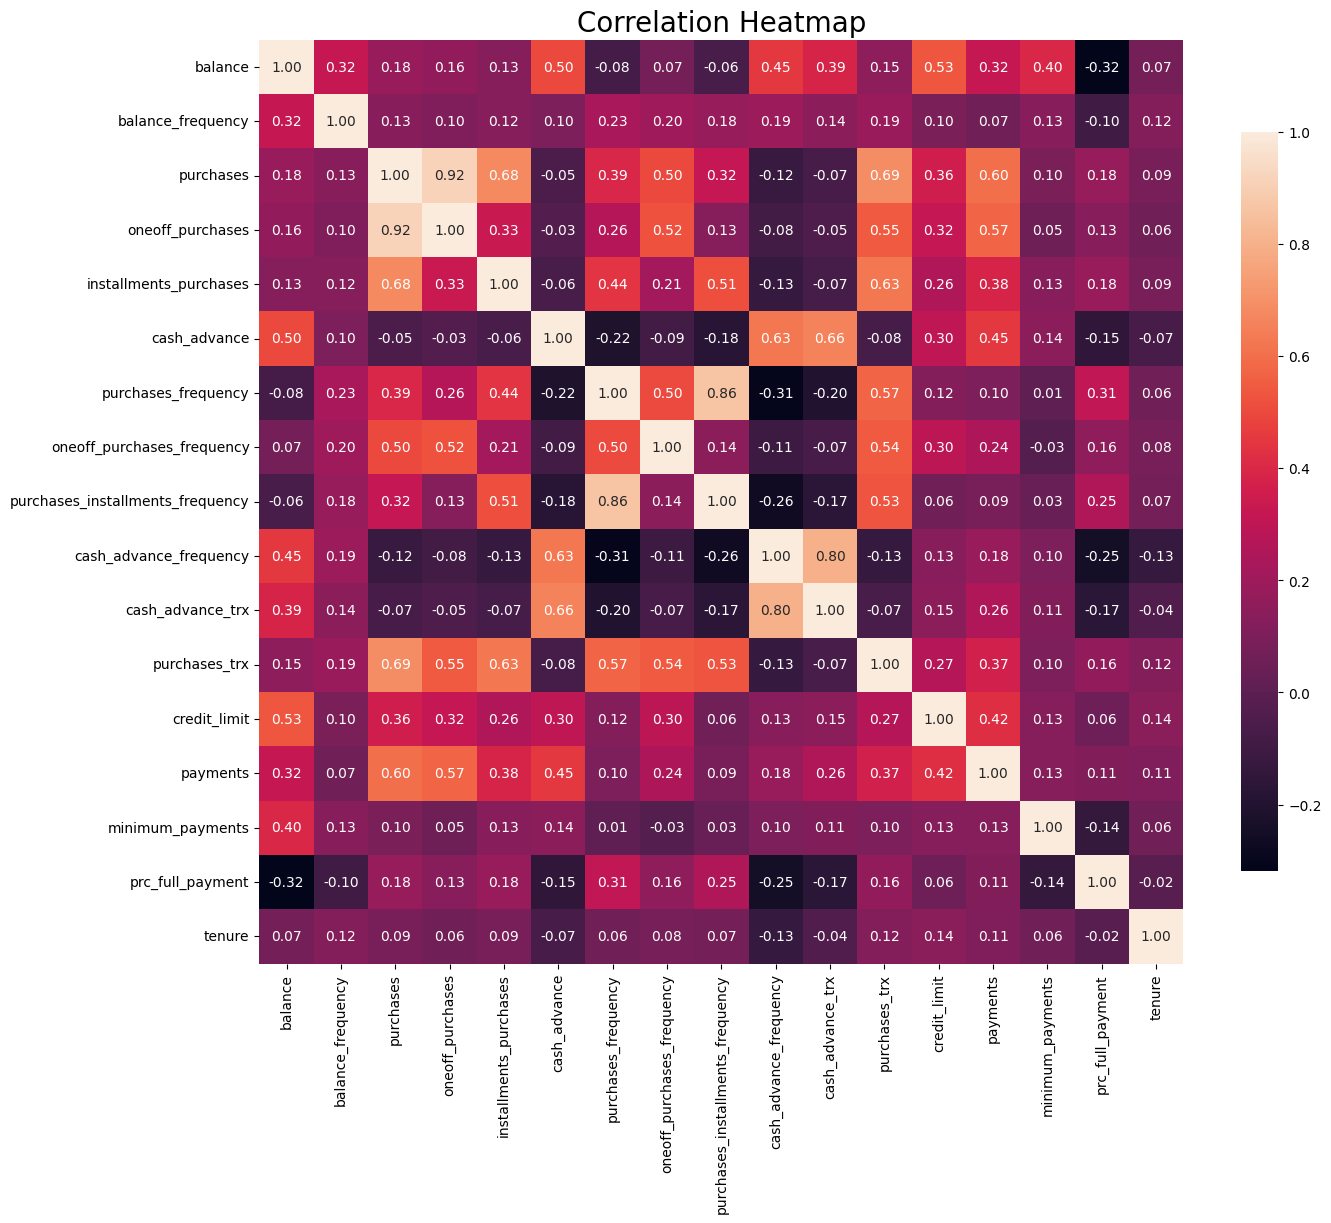

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 12)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [14]:
high_corr = correlation_matrix.where(np.abs(correlation_matrix) > 0.7)
high_corr

balance  balance_frequency  purchases  \
balance                               1.0                NaN        NaN   
balance_frequency                     NaN                1.0        NaN   
purchases                             NaN                NaN   1.000000   
oneoff_purchases                      NaN                NaN   0.916845   
installments_purchases                NaN                NaN        NaN   
cash_advance                          NaN                NaN        NaN   
purchases_frequency                   NaN                NaN        NaN   
oneoff_purchases_frequency            NaN                NaN        NaN   
purchases_installments_frequency      NaN                NaN        NaN   
cash_advance_frequency                NaN                NaN        NaN   
cash_advance_trx                      NaN                NaN        NaN   
purchases_trx                         NaN                NaN        NaN   
credit_limit                          NaN                NaN        NaN   
payments                              NaN                NaN        NaN   
minimum_payments                      NaN                NaN        NaN   
prc_full_payment                      NaN                NaN        NaN   
tenure                                NaN                NaN        NaN   

                                  oneoff_purchases  installments_purchases  \
balance                                        NaN                     NaN   
balance_frequency                              NaN                     NaN   
purchases                                 0.916845                     NaN   
oneoff_purchases                          1.000000                     NaN   
installments_purchases                         NaN                     1.0   
cash_advance                                   NaN                     NaN   
purchases_frequency                            NaN                     NaN   
oneoff_purchases_frequency                     NaN                     NaN   
purchases_installments_frequency               NaN                     NaN   
cash_advance_frequency                         NaN                     NaN   
cash_advance_trx                               NaN                     NaN   
purchases_trx                                  NaN                     NaN   
credit_limit                                   NaN                     NaN   
payments                                       NaN                     NaN   
minimum_payments                               NaN                     NaN   
prc_full_payment                               NaN                     NaN   
tenure                                         NaN                     NaN   

                                  cash_advance  purchases_frequency  \
balance                                    NaN                  NaN   
balance_frequency                          NaN                  NaN   
purchases                                  NaN                  NaN   
oneoff_purchases                           NaN                  NaN   
installments_purchases                     NaN                  NaN   
cash_advance                               1.0                  NaN   
purchases_frequency                        NaN             1.000000   
oneoff_purchases_frequency                 NaN                  NaN   
purchases_installments_frequency           NaN             0.862934   
cash_advance_frequency                     NaN                  NaN   
cash_advance_trx                           NaN                  NaN   
purchases_trx                              NaN                  NaN   
credit_limit                               NaN                  NaN   
payments                                   NaN                  NaN   
minimum_payments                           NaN                  NaN   
prc_full_payment                           NaN                  NaN   
tenure                                     NaN                  NaN   


In [15]:
high_corr_pairs = []

for i in range(high_corr.shape[0]):
    for j in range(i+1, high_corr.shape[1]):
        if not np.isnan(high_corr.iloc[i, j]):
            high_corr_pairs.append((high_corr.index[i], high_corr.columns[j], high_corr.iloc[i, j]))
high_corr_list = [(pair[0], pair[1], pair[2]) for pair in high_corr_pairs]
print(high_corr_list)
column_names = [(pair[0], pair[1]) for pair in high_corr_list]
print(column_names)

[('purchases', 'oneoff_purchases', 0.9168445587151489), ('purchases_frequency', 'purchases_installments_frequency', 0.8629336372699634), ('cash_advance_frequency', 'cash_advance_trx', 0.7995607573993837)]
[('purchases', 'oneoff_purchases'), ('purchases_frequency', 'purchases_installments_frequency'), ('cash_advance_frequency', 'cash_advance_trx')]


<Axes: xlabel='purchases'>

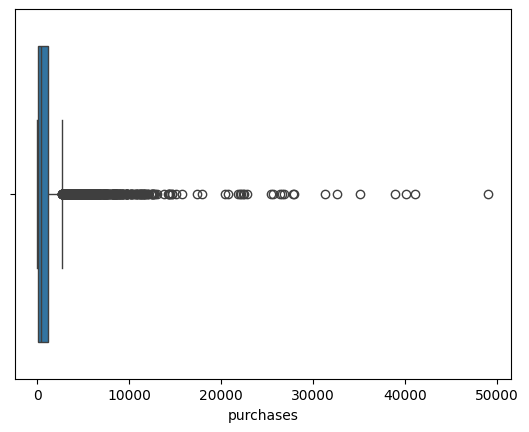

In [16]:
sns.boxplot(x=df['purchases'])

<Axes: xlabel='credit_limit'>

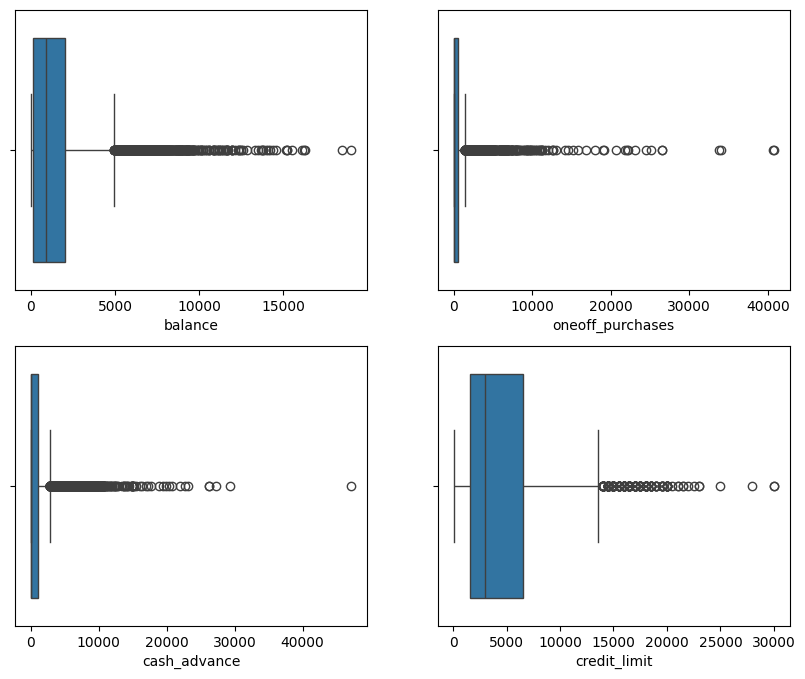

In [17]:
# purchases have a lot of outliers, lets check other columns
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='balance', data=df, ax=ax1)
sns.boxplot(x='oneoff_purchases', data=df, ax=ax2)
sns.boxplot(x='cash_advance', data=df, ax=ax3)
sns.boxplot(x='credit_limit', data=df, ax=ax4)

<Axes: xlabel='purchases'>

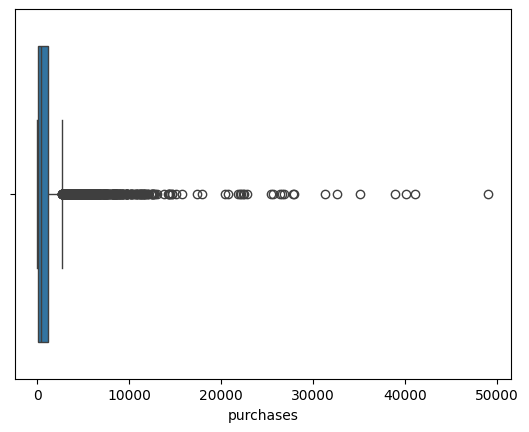

In [18]:
sns.boxplot(x=df['purchases'])

In [19]:
num_cols = ['purchases', 'balance', 'cash_advance', 'credit_limit', 'payments', 'oneoff_purchases']
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

## Feature Engineering
Next, we create some new features that may provide more direct insight. The features we choose are:
- **Balance to Credit Limit:** The credit limit ratio currently being utilized.
- **Average Purchase Amount**
- **Total Purchases:** A sum of all purchases per customer.
- **Credit Utilization Score:** Capping the Balance to Credit Limit to a maximum score of 1, indicating financial strength.

In [20]:
df['balance_to_credit_limit'] = df['balance'] / df['credit_limit']
df['avg_purchase_amnt'] = np.where(df['purchases_trx'] == 0, 0, df['purchases'] / df['purchases_trx'])
df['total_purchases'] = df['purchases'] + df['oneoff_purchases'] + df['installments_purchases']
df['credit_utilization_score'] = df['balance_to_credit_limit'].clip(upper=1)

We check and cap outliers in the new features as we did with the initial features. With our new features rendering some of the initial features less important, we can drop certain features to reduce multicollinearity. We will continue this process until we are satisfied.

<Axes: xlabel='credit_utilization_score'>

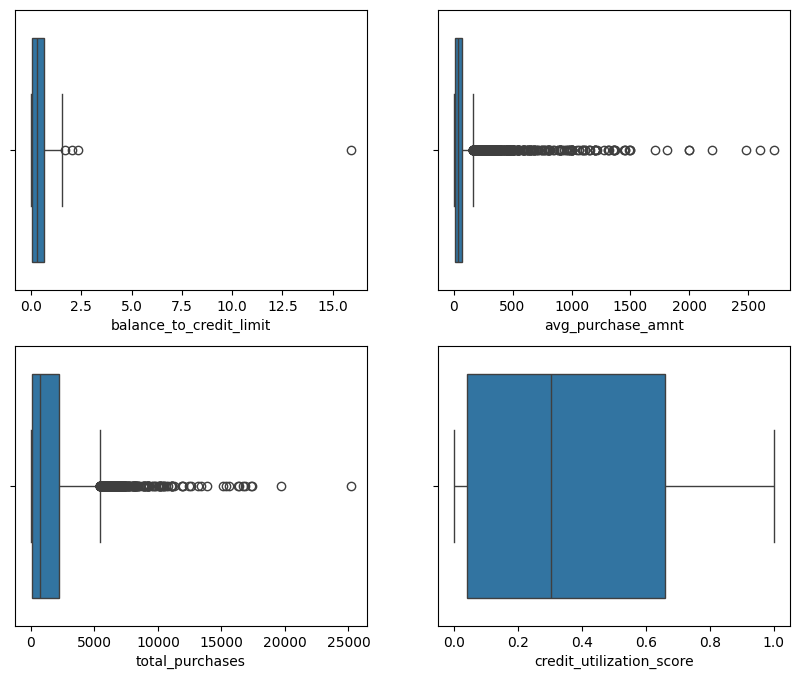

In [21]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='balance_to_credit_limit', data=df, ax=ax1)
sns.boxplot(x='avg_purchase_amnt', data=df, ax=ax2)
sns.boxplot(x='total_purchases', data=df, ax=ax3)
sns.boxplot(x='credit_utilization_score', data=df, ax=ax4)

In [22]:
newcols = ['balance_to_credit_limit','avg_purchase_amnt','total_purchases']
for column in newcols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [23]:
corr_matrix = df.corr()
new_high_corr = correlation_matrix.where(np.abs(correlation_matrix) > 0.7)
new_high_corr

balance  balance_frequency  purchases  \
balance                               1.0                NaN        NaN   
balance_frequency                     NaN                1.0        NaN   
purchases                             NaN                NaN   1.000000   
oneoff_purchases                      NaN                NaN   0.916845   
installments_purchases                NaN                NaN        NaN   
cash_advance                          NaN                NaN        NaN   
purchases_frequency                   NaN                NaN        NaN   
oneoff_purchases_frequency            NaN                NaN        NaN   
purchases_installments_frequency      NaN                NaN        NaN   
cash_advance_frequency                NaN                NaN        NaN   
cash_advance_trx                      NaN                NaN        NaN   
purchases_trx                         NaN                NaN        NaN   
credit_limit                          NaN                NaN        NaN   
payments                              NaN                NaN        NaN   
minimum_payments                      NaN                NaN        NaN   
prc_full_payment                      NaN                NaN        NaN   
tenure                                NaN                NaN        NaN   

                                  oneoff_purchases  installments_purchases  \
balance                                        NaN                     NaN   
balance_frequency                              NaN                     NaN   
purchases                                 0.916845                     NaN   
oneoff_purchases                          1.000000                     NaN   
installments_purchases                         NaN                     1.0   
cash_advance                                   NaN                     NaN   
purchases_frequency                            NaN                     NaN   
oneoff_purchases_frequency                     NaN                     NaN   
purchases_installments_frequency               NaN                     NaN   
cash_advance_frequency                         NaN                     NaN   
cash_advance_trx                               NaN                     NaN   
purchases_trx                                  NaN                     NaN   
credit_limit                                   NaN                     NaN   
payments                                       NaN                     NaN   
minimum_payments                               NaN                     NaN   
prc_full_payment                               NaN                     NaN   
tenure                                         NaN                     NaN   

                                  cash_advance  purchases_frequency  \
balance                                    NaN                  NaN   
balance_frequency                          NaN                  NaN   
purchases                                  NaN                  NaN   
oneoff_purchases                           NaN                  NaN   
installments_purchases                     NaN                  NaN   
cash_advance                               1.0                  NaN   
purchases_frequency                        NaN             1.000000   
oneoff_purchases_frequency                 NaN                  NaN   
purchases_installments_frequency           NaN             0.862934   
cash_advance_frequency                     NaN                  NaN   
cash_advance_trx                           NaN                  NaN   
purchases_trx                              NaN                  NaN   
credit_limit                               NaN                  NaN   
payments                                   NaN                  NaN   
minimum_payments                           NaN                  NaN   
prc_full_payment                           NaN                  NaN   
tenure                                     NaN                  NaN   


In [24]:
# check purchase frequency vs purchase installment frequency
columns_to_drop = ['purchases_frequency', 'cash_advance_trx', 'purchases_installments_frequency']
df.drop(columns=columns_to_drop, inplace=True)

In [25]:
newcorr_matrix = df.corr()
print(newcorr_matrix)

                             balance  balance_frequency  purchases  \
balance                     1.000000           0.379129   0.095805   
balance_frequency           0.379129           1.000000   0.198280   
purchases                   0.095805           0.198280   1.000000   
oneoff_purchases            0.124043           0.157486   0.830603   
installments_purchases      0.091988           0.124292   0.581169   
cash_advance                0.557393           0.126291  -0.177093   
oneoff_purchases_frequency  0.072095           0.202415   0.665280   
cash_advance_frequency      0.485531           0.191873  -0.190639   
purchases_trx               0.129628           0.189626   0.679002   
credit_limit                0.488555           0.102552   0.330448   
payments                    0.350558           0.153270   0.501153   
minimum_payments            0.368726           0.131181   0.055608   
prc_full_payment           -0.375336          -0.095082   0.220938   
tenure              

In [26]:
dropcols = ['oneoff_purchases', 'installments_purchases', 'credit_limit']
df.drop(columns=dropcols, inplace=True)

### Features Dropped
In total, the features we dropped were:
- Purchases Frequency
- Cash Advance Transactions
- Purchases Installments Frequency
- One Off Purchases
- Installments Purchases
- Credit Limit

We will further check our data to see if there are any patterns we can find

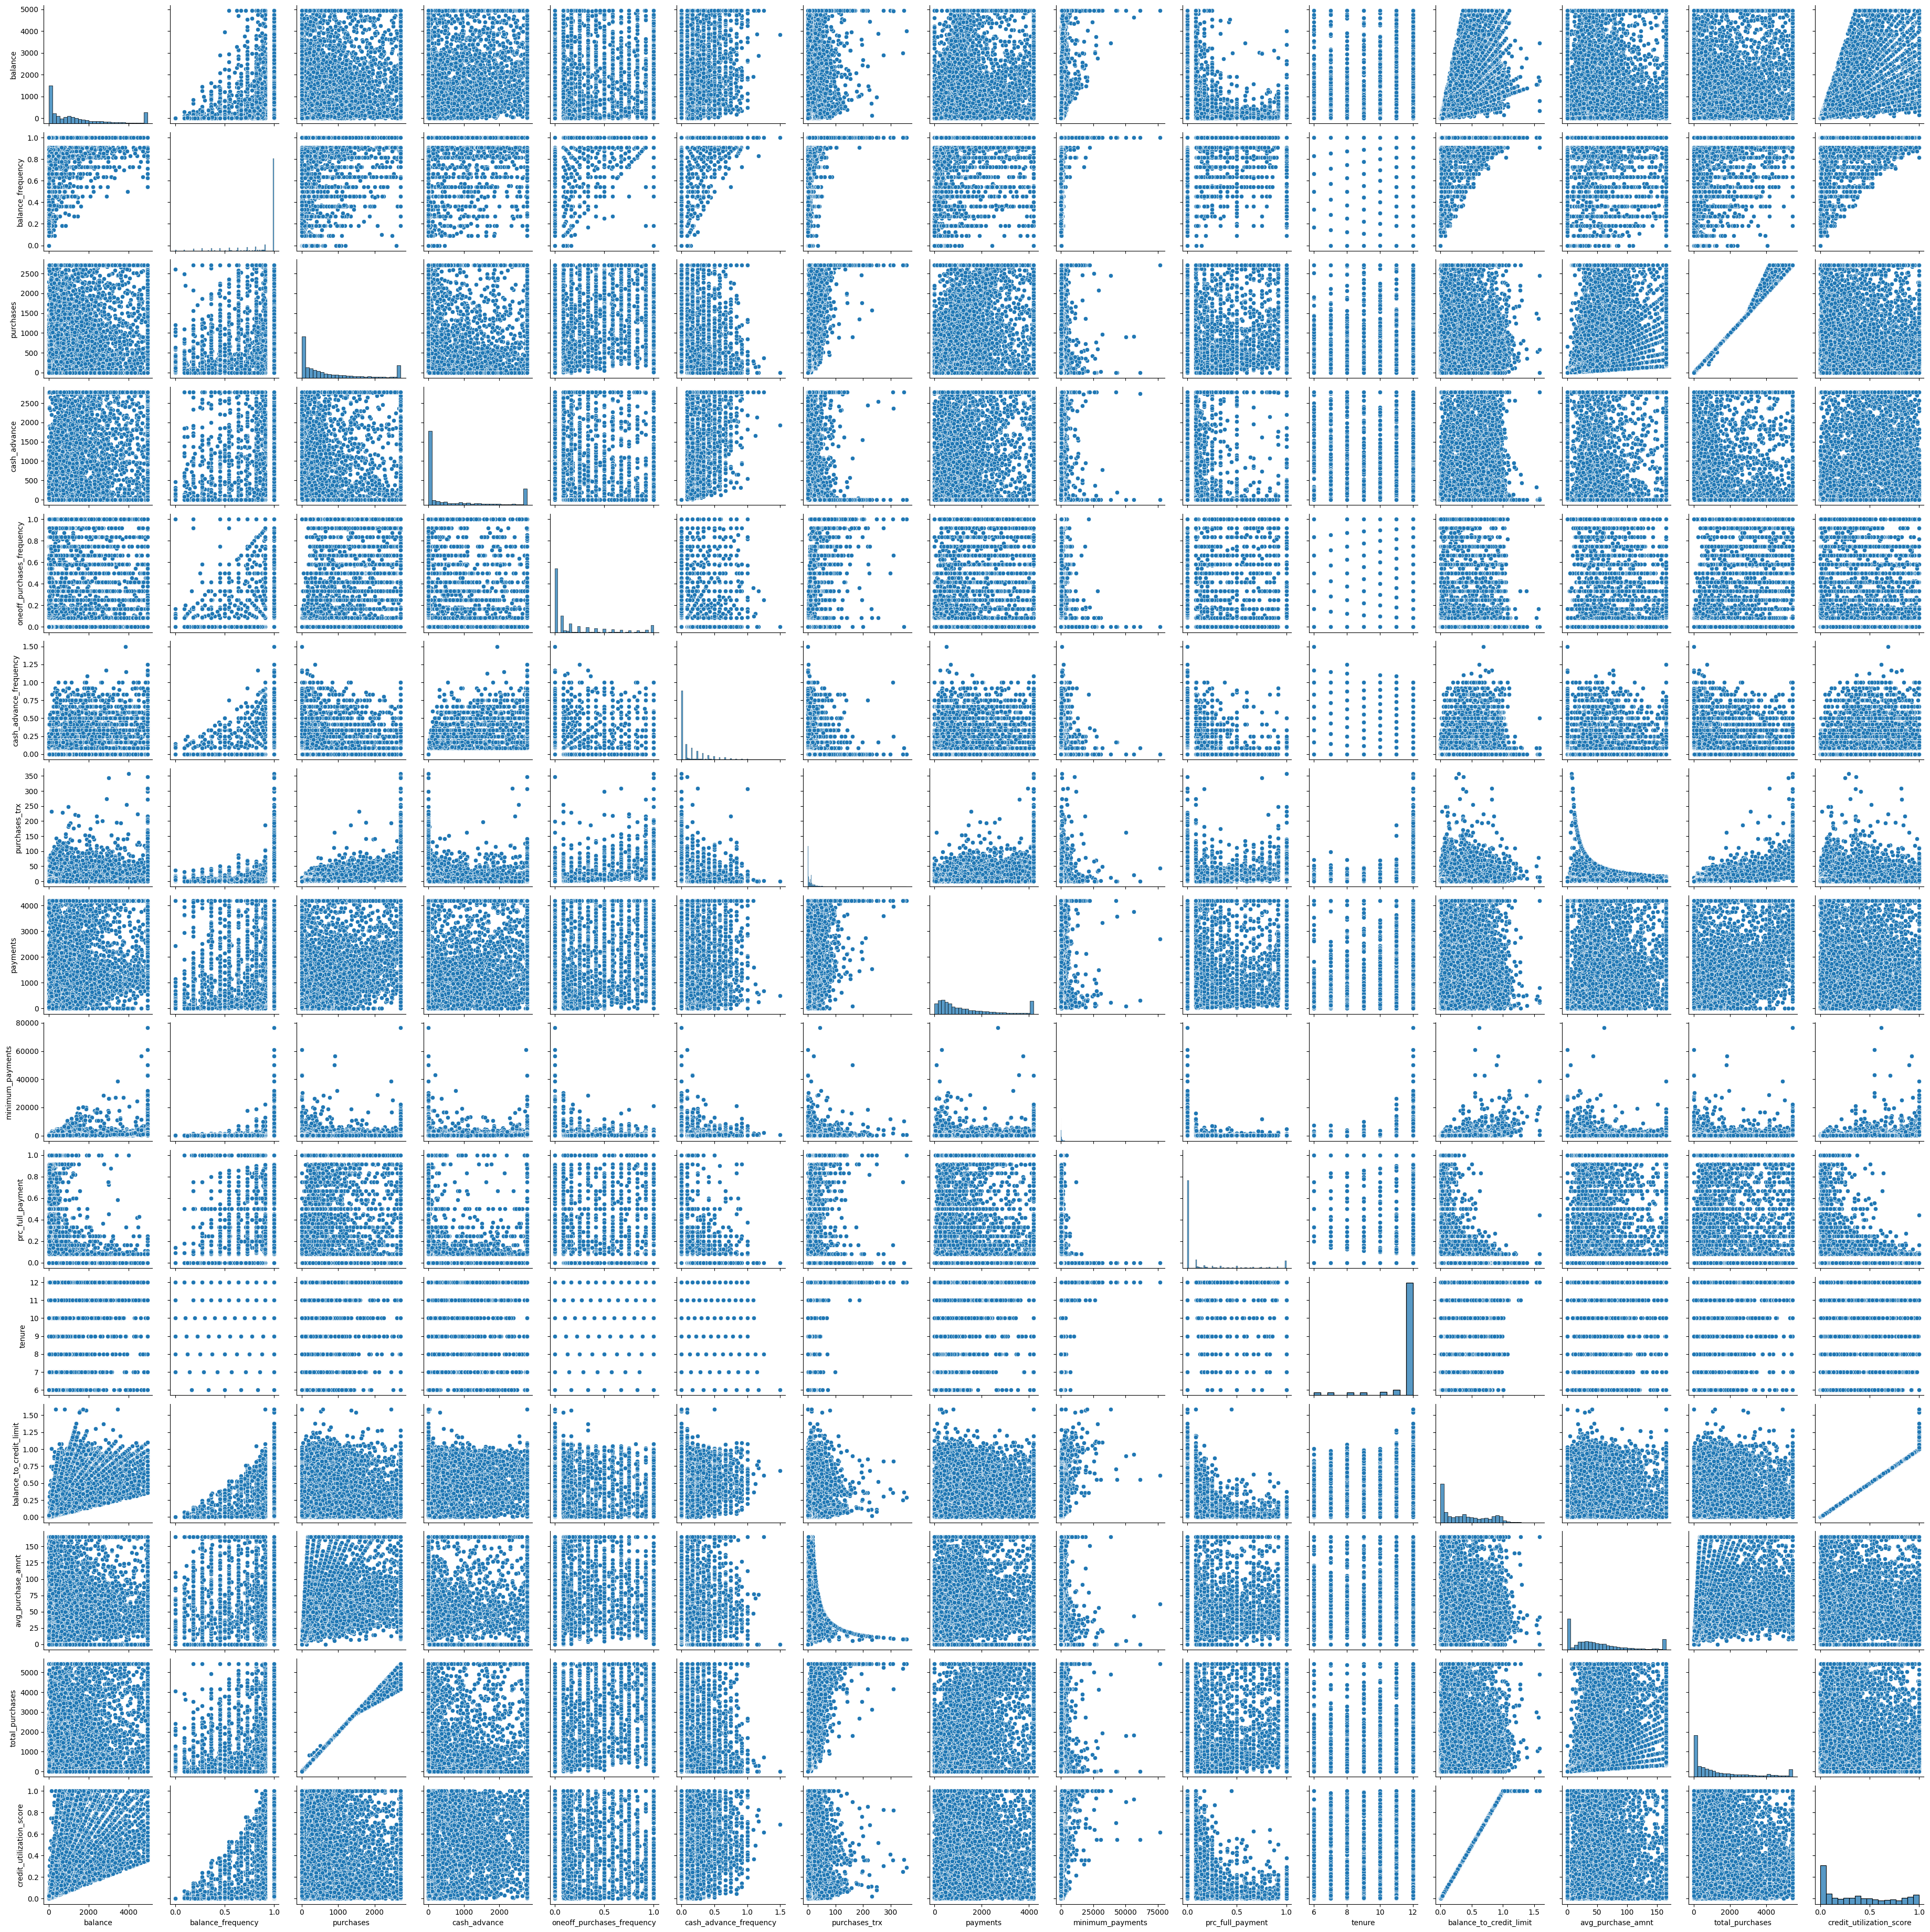

In [27]:
sns.pairplot(df)

Text(0.5, 0, 'Average Purchase')

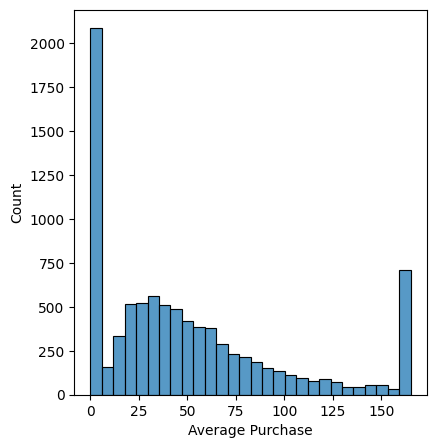

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_purchase_amnt'])
plt.xlabel('Average Purchase')

<Axes: xlabel='balance_to_credit_limit', ylabel='payments'>

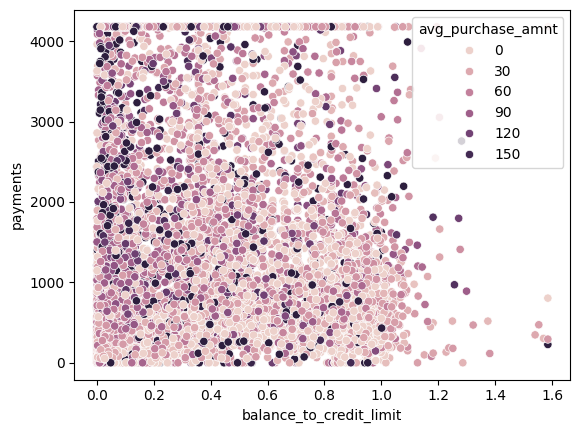

In [ ]:
#higher avg purchase amount has higher payments, and lower balance to credit limit, indicating those are
#possibly financially strong customers who also pay their bills responsibly
#we may consider higher payments as significant to forming a segment of the best customers
sns.scatterplot(data=df, x='balance_to_credit_limit', y='payments', hue='avg_purchase_amnt')

Higher average purchase amount (dark circles) has higher payments, and a lower balance to credit limit, indicating those are possibly financially stronger customers who also pay their bills responsibly.
We may consider higher payments as significant to forming a segment of the best customers.

<Axes: xlabel='payments', ylabel='purchases'>

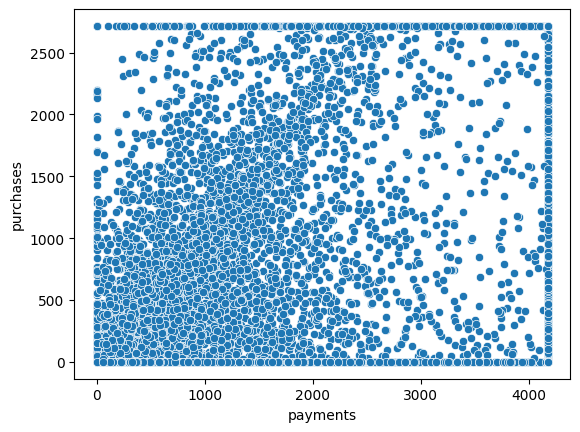

In [56]:
sns.scatterplot(data=df, x='payments', y='purchases')

Text(0.5, 0, 'Payments')

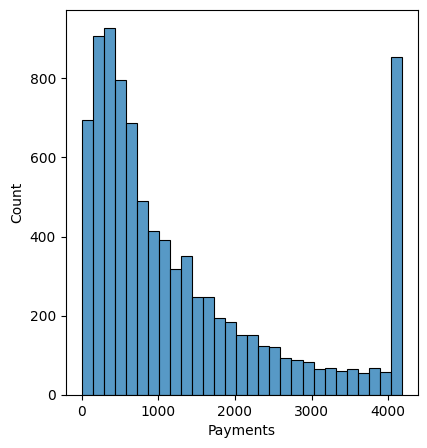

In [57]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['payments'])
plt.xlabel('Payments')

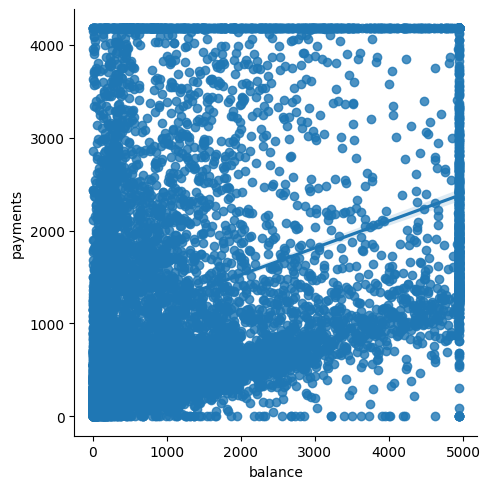

In [58]:
sns.lmplot(data=df, x='balance', y='payments')

Based on the charts, it seems that the most densely packed region will be customers with lower balances, fewer purchases, and overall lower financial strength. However, there seems to be a segment that is both financially strong, as well as responsible with its payments. This could form a separate, albeit significantly smaller, segment.

# Clustering
We now check our clusters with several different scalers. This process is similar to a grid search, where we go through each scaler and cluster combination. The scalers we selected were **Standard**, **Min Max**, and **Robust**. The cluster methods we selected were **DBSCAN**, **Hierarchical**, and **Mean Shift**. We did not select **K-means** because it relies on a specific distribution of the data points, which this data does not have.
We considered **DBSCAN** for its ability to identify clusters of varying shapes and sizes. **Hierarchical clustering** is well suited for customer segmentation, as it effectively interprets relationships between segments. We utilized **Mean Shift** for its effectiveness in locating high-density regions, indicating major customer habits.
All selected cluster methods did not require the number of clusters to be predefined. This choice allowed us to see how the data was initially segmented.

In [28]:
# wanna check different scaling methods, maybe that is the problem
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [29]:
def scale_and_visualize(scaler, df):
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

    scaled_df.hist(figsize=(15, 10), bins=30)
    plt.suptitle(f'Distribution of Scaled Features using {scaler.__class__.__name__}', fontsize=16)
    plt.show()

    return scaled_df

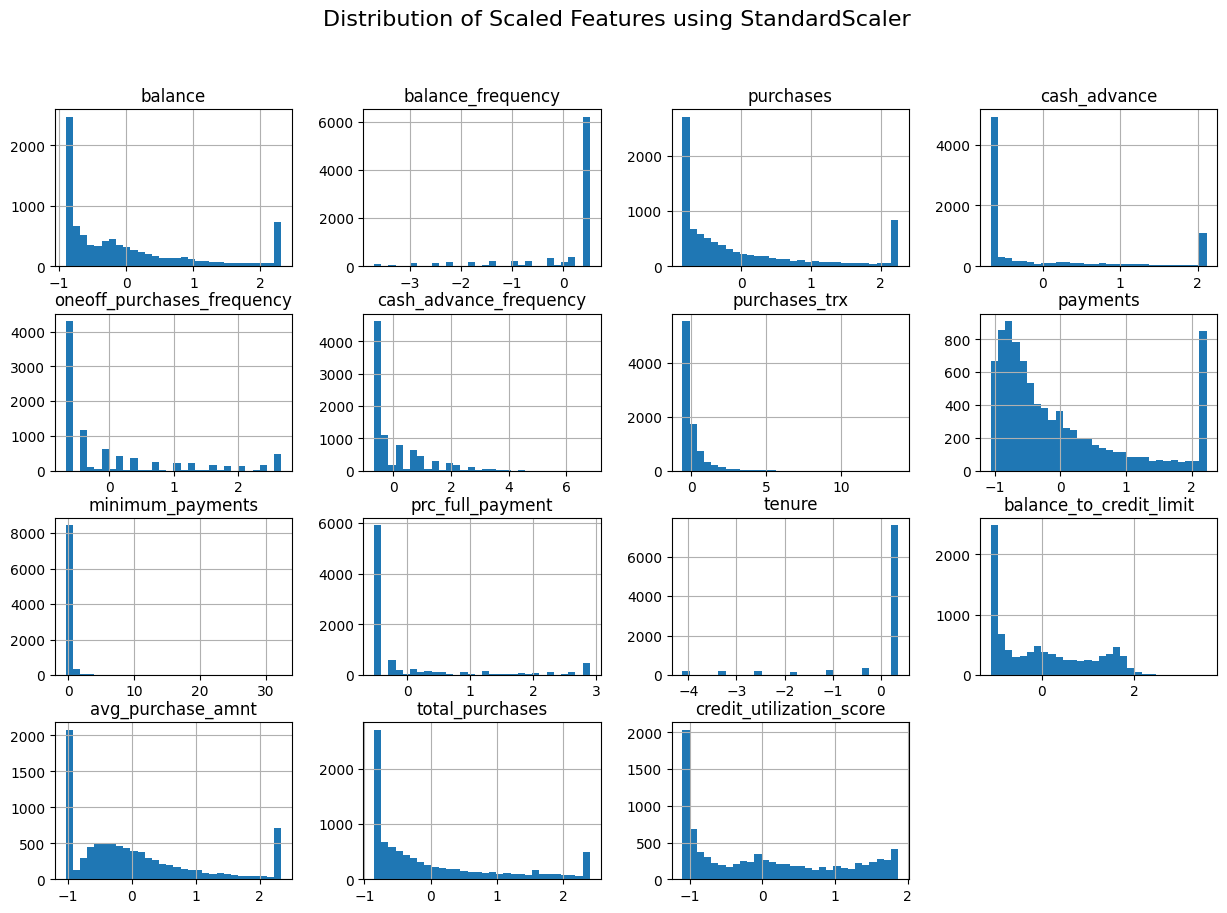

StandardScaler - DBSCAN Silhouette Score: -0.44180025870180534
StandardScaler - DBSCAN Cluster Counts:
-1     6751
 2     1233
 1      590
 6       48
 4       38
 8       17
 31      16
 3       15
 10      12
 30      11
 9       10
 35      10
 5       10
 13      10
 16       9
 15       8
 11       8
 22       8
 12       8
 7        8
 20       8
 27       7
 37       7
 14       7
 23       7
 21       6
 18       6
 39       5
 36       5
 42       5
 0        5
 24       5
 26       5
 25       5
 32       5
 19       5
 34       5
 17       5
 28       5
 29       5
 38       5
 33       4
 40       4
 41       4
Name: count, dtype: int64

StandardScaler - Hierarchical Silhouette Score: 0.16666261637135518
StandardScaler - Hierarchical Cluster Counts:
1    3718
0    2568
3     967
2     884
4     813
Name: count, dtype: int64

StandardScaler - Mean Shift Silhouette Score: 0.4396542596960787
StandardScaler - Mean Shift Cluster Counts:
0    8858
2      40
3      37
8       7
1 

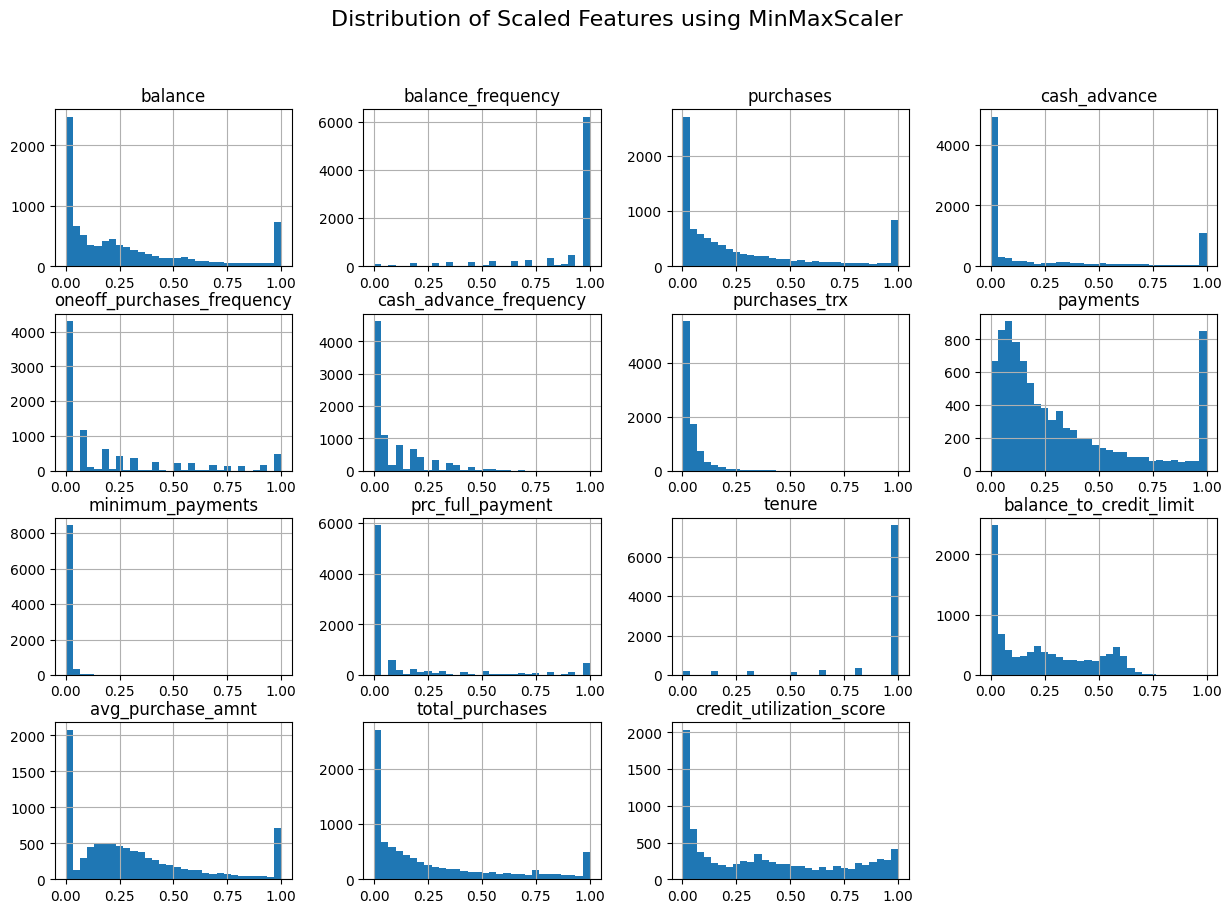

MinMaxScaler - DBSCAN Silhouette Score: 0.18575088649187244
MinMaxScaler - DBSCAN Cluster Counts:
 0    8778
-1     172
Name: count, dtype: int64

MinMaxScaler - Hierarchical Silhouette Score: 0.18555409279291882
MinMaxScaler - Hierarchical Cluster Counts:
0    3088
3    2002
1    1346
4    1316
2    1198
Name: count, dtype: int64

MinMaxScaler - Mean Shift Silhouette Score: -1
MinMaxScaler - Mean Shift Cluster Counts:
0    8950
Name: count, dtype: int64



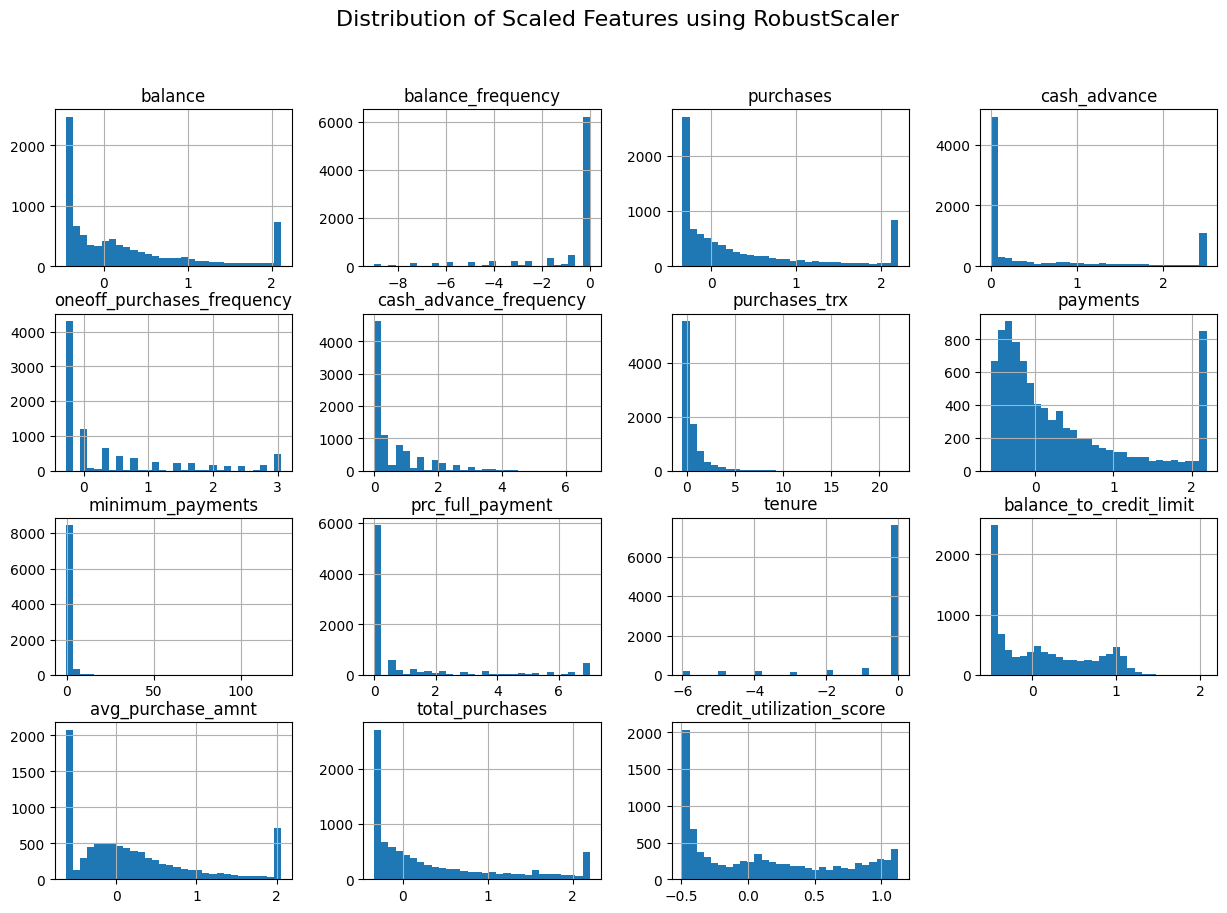

RobustScaler - DBSCAN Silhouette Score: -0.4643003989861829
RobustScaler - DBSCAN Cluster Counts:
-1     6928
 0     1023
 14     230
 5       56
 6       55
       ... 
 39       5
 68       5
 57       5
 43       5
 51       4
Name: count, Length: 70, dtype: int64

RobustScaler - Hierarchical Silhouette Score: 0.28685747080293933
RobustScaler - Hierarchical Cluster Counts:
0    6224
3    1333
1    1312
4      62
2      19
Name: count, dtype: int64

RobustScaler - Mean Shift Silhouette Score: 0.4666031288498803
RobustScaler - Mean Shift Cluster Counts:
0     8713
1      123
4       24
12      23
2       22
10      10
3        8
11       5
5        4
19       3
7        3
6        2
9        2
8        2
13       1
18       1
14       1
15       1
17       1
16       1
Name: count, dtype: int64



In [30]:
# test the scalers
for scaler_name, scaler in scalers.items():
    scaled_df = scale_and_visualize(scaler, df)

    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(scaled_df)
    silhouette_dbscan = silhouette_score(scaled_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    print(f'{scaler_name} - DBSCAN Silhouette Score: {silhouette_dbscan}')
    print(f'{scaler_name} - DBSCAN Cluster Counts:\n{pd.Series(dbscan_labels).value_counts()}\n')


    # Hierarchical 
    hierarchical = AgglomerativeClustering(n_clusters=5)
    hierarchical_labels = hierarchical.fit_predict(scaled_df)
    silhouette_hierarchical = silhouette_score(scaled_df, hierarchical_labels) if len(set(hierarchical_labels)) > 1 else -1
    print(f'{scaler_name} - Hierarchical Silhouette Score: {silhouette_hierarchical}')
    print(f'{scaler_name} - Hierarchical Cluster Counts:\n{pd.Series(hierarchical_labels).value_counts()}\n')


    # mean shift
    mean_shift = MeanShift()
    mean_shift_labels = mean_shift.fit_predict(scaled_df)
    silhouette_meanshift = silhouette_score(scaled_df, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else -1
    print(f'{scaler_name} - Mean Shift Silhouette Score: {silhouette_meanshift}')
    print(f'{scaler_name} - Mean Shift Cluster Counts:\n{pd.Series(mean_shift_labels).value_counts()}\n')

We relied on both the silhouette score and the cluster distributions. The silhouette score alone is not sufficient since even poor clusters can have a high score. A good example is provided in our **Mean Shift** cluster with a Robust scaler: it has the highest silhouette score, yet the clusters are very poor. **DBSCAN** was uniformly poor across the different methods, likely due to its focus on dense areas, while the majority of the dataset is tightly clustered in a single region.

### Final Selection
Based on our two metrics, we find that **Hierarchical** clustering with the **Robust** scaler had an acceptable silhouette score of nearly 29% and formed 5 clusters. The other method we considered was MinMax scaling, which produced good clusters. However, after analyzing the output of both methods, we found that while MinMax provided useful insights, we had higher confidence in Robust scaling due to the imbalance in cluster sizes aligning well with customer profiles. Here, the silhouette score was the deciding factor, with a difference of 10%, leading us to trust the profiles we created with Robust scaling.

Finally, we tested different numbers of clusters as well as different linkage methods. Based on our output, we decided to keep 5 clusters and use Ward linkage.

In [31]:
minmax_scaler = MinMaxScaler()
scaled_df_minmax = minmax_scaler.fit_transform(df)
scaled_df_minmax = pd.DataFrame(scaled_df_minmax, columns=df.columns)

hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(scaled_df_minmax)

clustered_df = scaled_df_minmax.copy()
clustered_df['Cluster'] = hierarchical_labels

cluster_summary = clustered_df.groupby('Cluster').agg(['mean', 'median', 'count'])
print(cluster_summary)

          balance                 balance_frequency                 purchases  \
             mean    median count              mean    median count      mean   
Cluster                                                                         
0        0.050049  0.013481  3088          0.720186  0.857143  3088  0.129485   
1        0.639709  0.647402  1346          0.950696  1.000000  1346  0.125508   
2        0.393790  0.244862  1198          0.964328  1.000000  1198  0.924575   
3        0.388060  0.303180  2002          0.990061  1.000000  2002  0.101585   
4        0.192624  0.136199  1316          0.919934  1.000000  1316  0.417504   

                        cash_advance  ... balance_to_credit_limit  \
           median count         mean  ...                   count   
Cluster                               ...                           
0        0.086142  3088     0.092322  ...                    3088   
1        0.006116  1346     0.892329  ...                    1346   
2     

In [32]:
#cluster 0: low balances and utilization, maybe inactive?
#cluster 1: high balances and usage frequency. valuable customers
#cluster 2: active spenders with moderate balances and high purchasing frequency. main base?
#cluster 3: moderate balances but high credit utilization
#cluster 4: same as 1 but with lower balance

In [33]:
robust_scaler = RobustScaler()
scaled_df_robust = robust_scaler.fit_transform(df)
scaled_df_robust = pd.DataFrame(scaled_df_robust, columns=df.columns)

hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(scaled_df_robust)

clustered_df = scaled_df_robust.copy()
clustered_df['Cluster'] = hierarchical_labels

cluster_summary = clustered_df.groupby('Cluster').agg(['mean', 'median', 'count'])
print(cluster_summary)

          balance                 balance_frequency               purchases  \
             mean    median count              mean  median count      mean   
Cluster                                                                       
0        0.516379  0.262514  6224         -0.215665  0.0000  6224  0.323481   
1       -0.354744 -0.405599  1312         -1.330355  0.0000  1312  0.841302   
2        1.807848  2.113106    19          0.000000  0.0000    19  0.384080   
3       -0.337661 -0.432771  1333         -5.091757 -4.9091  1333 -0.009677   
4        1.136310  0.944387    62         -0.174487  0.0000    62  0.499470   

                        cash_advance  ... balance_to_credit_limit  \
           median count         mean  ...                   count   
Cluster                               ...                           
0       -0.029239  6224     0.765461  ...                    6224   
1        0.571511  1312     0.060603  ...                    1312   
2        0.054517    1

In [34]:
# trying other cluster ranges, sticking with ward
for n_clusters in range(3, 9):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # Change 'ward' to other methods if desired
    hierarchical_labels = hierarchical.fit_predict(scaled_df)
    silhouette_hierarchical = silhouette_score(scaled_df, hierarchical_labels) if len(set(hierarchical_labels)) > 1 else -1
    
    print(f'n_clusters={n_clusters} - Hierarchical Silhouette Score: {silhouette_hierarchical}')
    print(f'n_clusters={n_clusters} - Hierarchical Cluster Counts:\n{pd.Series(hierarchical_labels).value_counts()}\n')

n_clusters=3 - Hierarchical Silhouette Score: 0.264933073848231
n_clusters=3 - Hierarchical Cluster Counts:
2    6224
0    2645
1      81
Name: count, dtype: int64

n_clusters=4 - Hierarchical Silhouette Score: 0.28599588416423394
n_clusters=4 - Hierarchical Cluster Counts:
2    6224
3    1333
1    1312
0      81
Name: count, dtype: int64

n_clusters=5 - Hierarchical Silhouette Score: 0.28685747080293933
n_clusters=5 - Hierarchical Cluster Counts:
0    6224
3    1333
1    1312
4      62
2      19
Name: count, dtype: int64

n_clusters=6 - Hierarchical Silhouette Score: 0.27227499746695494
n_clusters=6 - Hierarchical Cluster Counts:
0    4975
3    1333
1    1312
2    1249
4      62
5      19
Name: count, dtype: int64

n_clusters=7 - Hierarchical Silhouette Score: 0.2808667765762333
n_clusters=7 - Hierarchical Cluster Counts:
5    4387
3    1333
1    1312
0    1249
6     588
4      62
2      19
Name: count, dtype: int64

n_clusters=8 - Hierarchical Silhouette Score: 0.28512477528040275
n_

In [35]:
# testing different linkages
linkage_methods = ['ward', 'average', 'complete', 'single']
n_clusters = 5

for method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    hierarchical_labels = hierarchical.fit_predict(scaled_df)
    
    silhouette = silhouette_score(scaled_df, hierarchical_labels) if len(set(hierarchical_labels)) > 1 else -1
    print(f'Linkage Method: {method} - Silhouette Score: {silhouette}')
    print(f'Linkage Method: {method} - Cluster Counts:\n{pd.Series(hierarchical_labels).value_counts()}\n')

Linkage Method: ward - Silhouette Score: 0.28685747080293933
Linkage Method: ward - Cluster Counts:
0    6224
3    1333
1    1312
4      62
2      19
Name: count, dtype: int64

Linkage Method: average - Silhouette Score: 0.8159794339976284
Linkage Method: average - Cluster Counts:
0    8910
3      33
4       3
1       3
2       1
Name: count, dtype: int64

Linkage Method: complete - Silhouette Score: 0.8159794339976284
Linkage Method: complete - Cluster Counts:
0    8910
1      33
4       3
3       3
2       1
Name: count, dtype: int64

Linkage Method: single - Silhouette Score: 0.900461595241623
Linkage Method: single - Cluster Counts:
1    8943
0       3
2       2
3       1
4       1
Name: count, dtype: int64



In [36]:
final_hierarchical = AgglomerativeClustering(n_clusters=5)
final_hierarchical_labels = final_hierarchical.fit_predict(scaled_df_robust)

clustered_final_df = scaled_df_robust.copy()
clustered_final_df['Cluster'] = final_hierarchical_labels

final_cluster_summary = clustered_final_df.groupby('Cluster').agg(['mean', 'median', 'count'])
print(final_cluster_summary)

          balance                 balance_frequency               purchases  \
             mean    median count              mean  median count      mean   
Cluster                                                                       
0        0.516379  0.262514  6224         -0.215665  0.0000  6224  0.323481   
1       -0.354744 -0.405599  1312         -1.330355  0.0000  1312  0.841302   
2        1.807848  2.113106    19          0.000000  0.0000    19  0.384080   
3       -0.337661 -0.432771  1333         -5.091757 -4.9091  1333 -0.009677   
4        1.136310  0.944387    62         -0.174487  0.0000    62  0.499470   

                        cash_advance  ... balance_to_credit_limit  \
           median count         mean  ...                   count   
Cluster                               ...                           
0       -0.029239  6224     0.765461  ...                    6224   
1        0.571511  1312     0.060603  ...                    1312   
2        0.054517    1

In [37]:
# cluster 0: moderate balance, responsible usage, regular spending habits
# cluster 1: low balance, high spending relative to balance, possibly risky customers
# cluster 2: high value customers with strong financial position, moderate spending
# cluster 3: slightly negative balances, infrequent usage, possibly inactive
# cluster 4: decent balance, moderate spending, potential for more engagement

## Customer Segments
- **Cluster 0:** Customers exhibit a moderate balance, responsible usage, and regular spending habits.
- **Cluster 1:** These customers have a low balance and high spending relative to their balance, indicating higher risk.
- **Cluster 2:** This group consists of high value customers with a strong financial position and moderate spending.
- **Cluster 3:** Customers in this cluster have slightly negative balances and infrequent usage, suggesting they may be inactive.
- **Cluster 4:** This group shows a decent balance and moderate spending, indicating potential for greater engagement.

## PCA
We made a copy of our dataframe to run PCA on. The copy was a precaution against corrupting our data, since we know that PCA changes the features. The purpose of using PCA was to effectively graph the clusters and gain further insights. We checked what our Principle Components were made of and found that PC1 is heavily influenced by minimum payments (0.975) and balance frequency (0.125). Variations are primarily related to these features. PC2 is characterized by purchases frequency (0.244) and purchases transaction (0.456), so it is more focused on spending habits.

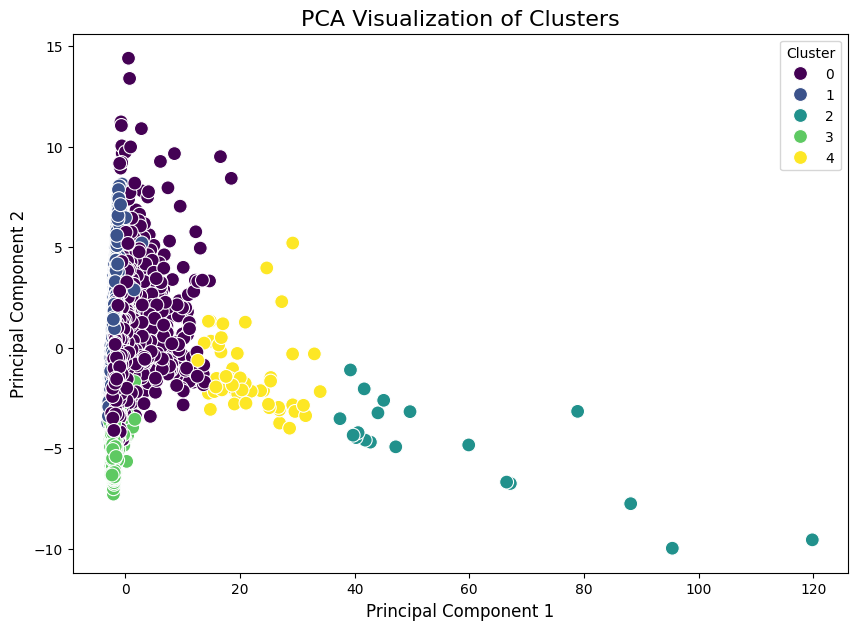

In [38]:
# will make a copy of the df to check visualizations with PCA, don't want to risk the original
# have to keep in mind this may change some relations so take it with a grain of salt
from sklearn.decomposition import PCA
df_copy = clustered_final_df.copy()
scaled_data = clustered_final_df.drop(columns='Cluster')
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clustered_final_df['Cluster']
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [39]:
loadings = pd.DataFrame(pca.components_, columns=df.columns)
loadings.index = [f'PC{i+1}' for i in range(loadings.shape[0])]
print(loadings)

      balance  balance_frequency  purchases  cash_advance  \
PC1  0.092496           0.124558   0.015998      0.042926   
PC2  0.063284           0.677670   0.243779     -0.034840   

     oneoff_purchases_frequency  cash_advance_frequency  purchases_trx  \
PC1                   -0.001472                0.035493       0.051084   
PC2                    0.261287               -0.021120       0.456482   

     payments  minimum_payments  prc_full_payment    tenure  \
PC1  0.035133          0.974768         -0.110863  0.028098   
PC2  0.154986         -0.097264          0.306149  0.127649   

     balance_to_credit_limit  avg_purchase_amnt  total_purchases  \
PC1                 0.052047          -0.009461         0.015724   
PC2                 0.014902           0.032974         0.232339   

     credit_utilization_score  
PC1                  0.049268  
PC2                  0.015205  


In [40]:
# PC1 heavily influenced by minimum payments 0.975 and balance frequency (0.125)
# variations primarily related to these features
# PC2 has purchases frequency (0.244) and purchases transaction (0.456)
# so focused on spending habits

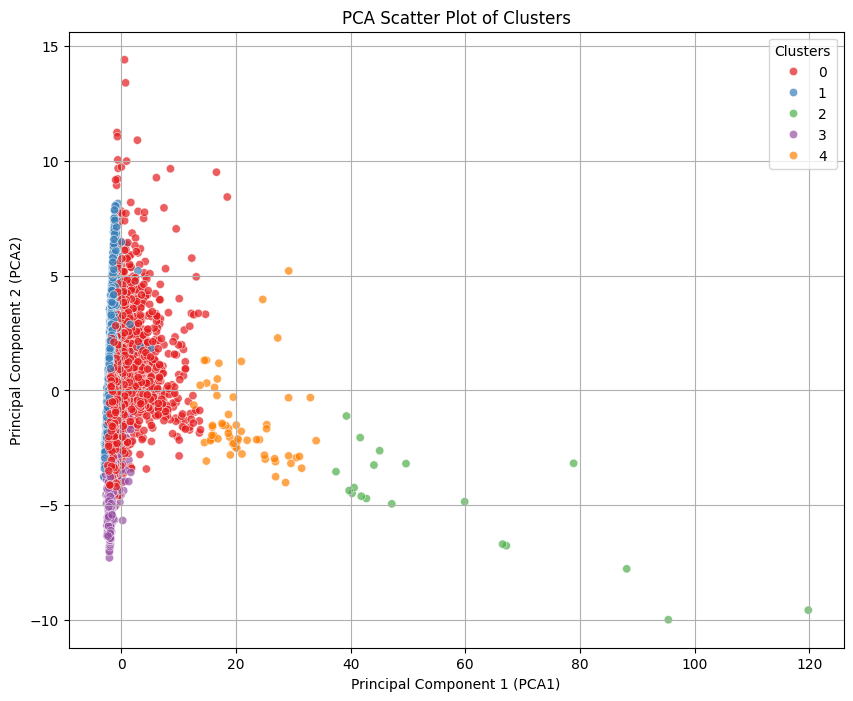

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Clusters')
plt.grid()
plt.show()

In [42]:
# checking that clusters match
pca_df['Original_Cluster'] = clustered_final_df['Cluster'].values
print(pca_df[['PCA1', 'PCA2', 'Cluster', 'Original_Cluster']].head(10))

       PCA1      PCA2  Cluster  Original_Cluster
0 -1.297124 -1.481402        3                 3
1  0.559909 -0.310991        0                 0
2 -0.103758  1.155208        0                 0
3 -1.084390 -1.864831        3                 3
4 -0.774839 -0.291947        0                 0
5  2.792672  0.282732        0                 0
6 -1.388632  5.925989        1                 1
7 -0.210204  0.140476        0                 0
8 -0.732341  0.249110        0                 0
9 -1.622096 -2.273573        3                 3


In [43]:
# so we know PC1 heavily influenced by minimum payments 0.975 and balance frequency (0.125)
# PC2 has purchases frequency (0.244) and purchases transaction (0.456)
# and the numbers in the PCA scale matter less than the positions of the clusters
# so this chart appears to show
# cluster 0 moderate on min payments and balance frequency, avg on frequency and txns
# cluster 1 lowest on min payments and blnce frqncy, avg on frqncy and txns
# cluster 2 highest on min payments and blnce frqncy, low on frqncy and txns
# cluster 3 moderate on min payments and balance frequency, bit low on frqncy and txns
# cluster 4 higher min payments and blnce frqncy, moderate frqncy and txns

# Findings
The findings of the PCA was consistent with what we had found earlier. We will reiterate this here for clarity.
- PC1 is heavily influenced by minimum payments (0.975) and balance frequency (0.125).
- PC2 is characterized by purchases frequency (0.244) and purchases transaction (0.456).
- The numbers in the PCA scale are less important than the positions of the clusters.
- This chart appears to show the following clusters:
  **Cluster 0**: Moderate on minimum payments and balance frequency, average on frequency and transactions.
  **Cluster 1**: Lowest on minimum payments and balance frequency, average on frequency and transactions.
  **Cluster 2**: Highest on minimum payments and balance frequency, low on frequency and transactions.
  **Cluster 3**: Moderate on minimum payments and balance frequency, slightly low on frequency and transactions.
  **Cluster 4**: Higher minimum payments and balance frequency, moderate frequency and transactions.

# Recommendations

## Cluster 0: Moderate Balance, Responsible Use
**Recommendations**: 
- **Enhance Reward Programs**: Implement a tiered rewards program that incentivizes responsible usage. Customers can unlock higher tiers with increased spending, leading to luxury travel rewards and exclusive benefits. 
- Offer premium credit cards or additional services tailored to responsible spenders, encouraging increases in credit limits or balance transfers.

**Incentivization Strategies**: 
Provide **targeted promotions** for luxury experiences, encouraging customers to upgrade their spending habits.

## Cluster 1: Low Balance, High Spending
**Recommendations**: 
  - Focus on targeted offers that encourage responsible spending, such as cash back on essential purchases or discounts for payments on time.
  - Consider implementing alerts to notify these customers when they are nearing their credit limit


## Cluster 2: High Value Customers, Strong Financial Position
**Recommendations**: 
- Develop premium products and exclusive offers tailored to this elite group, such as luxury travel rewards and personalized investment opportunities.
- Engage these customers with highly personalized marketing strategies, emphasizing their valued status and offering exclusive access to events of their interest.

## Cluster 3: Slightly Negative Balances, Infrequent Usage
**Recommendations**: 
- Launch targeted marketing initiatives aimed at re-engaging this segment with limited-time offers. 
- Campaign that offers these customers a small cash bonus or reward points for making a purchase within the next month to emphasize the ease of earning rewards by using their card again.

## Cluster 4: Decent Balance, Moderate Spending
**Recommendations**: 
- Consider highly targeted promotions to encourage usage, such as personalized offers for specific spending categories. This is a small group so this is very feasible.

**Incentivization Strategies**: 
- Offer cash back or rewards to spend in high end categories to encourage movement towards higher value behaviors.
- Offer access to exclusive experiences or events to entice increased engagement.
